I want the model to learn whether a person is at risk of having a stroke based on their medical history, demographics, and lifestyle

so that is the core signal to the model `medical history`, `demographics` and `lifestyle`

Now let us understand that the model needs to *see* in order to make that prediction

## We don’t “do EDA” — we pick a question.

In [31]:
import pandas as pd
import seaborn as sns
sns.set_theme(style="white")
stroke_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [32]:
stroke_data.sample(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
3696,53476,Female,31.0,0,0,Yes,Private,Urban,90.00,38.6,never smoked,0
373,34402,Female,23.0,0,0,Yes,Private,Rural,91.97,21.6,formerly smoked,0
3912,61050,Male,37.0,0,0,Yes,Govt_job,Rural,107.58,25.3,never smoked,0
2821,13386,Female,71.0,0,1,Yes,Self-employed,Rural,98.45,29.7,Unknown,0
1701,4789,Male,8.0,0,0,No,children,Rural,91.54,13.4,Unknown,0
4823,7218,Female,79.0,0,0,Yes,Private,Rural,214.73,30.9,never smoked,0
2070,65109,Male,47.0,0,0,Yes,Private,Urban,71.42,34.9,smokes,0
1641,50889,Female,21.0,0,0,No,Govt_job,Rural,56.63,49.8,never smoked,0
1055,58138,Male,57.0,0,0,Yes,Private,Rural,111.64,31.5,never smoked,0
662,23551,Male,28.0,0,0,Yes,Private,Urban,87.43,55.7,Unknown,0


In [33]:
stroke_data.drop(columns='id', inplace=True)

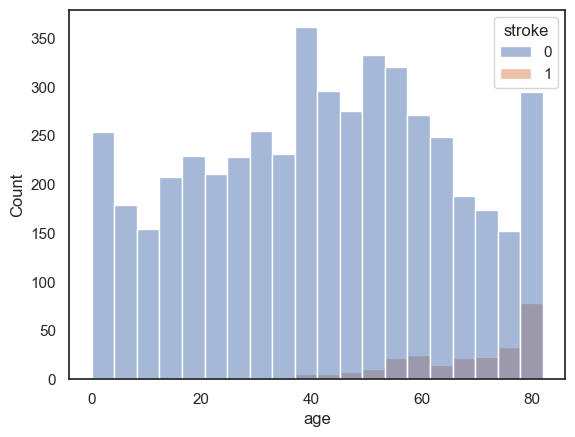

In [34]:
def age_stroke_dist(df):
    sns.histplot(data=df, x='age', hue='stroke')

age_stroke_dist(stroke_data)

## we bin the age into groups so that model can learn the non-linear increase in stroke cases with age

In [35]:
def age_transformation(df):
    df['age_group'] = pd.cut(
        df['age'], 
        labels=["0-30", "30-60", "60+"], 
        bins=[0, 30, 60, 100]
    )
    df['age_over_60'] = (df.age > 60).astype(int)
    df['age_over_80'] = (df.age > 80).astype(int)
    return df

stroke_data = age_transformation(stroke_data)
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,age_over_60,age_over_80
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60+,1,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60+,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60+,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,30-60,0,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60+,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,60+,1,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,60+,1,1
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,30-60,0,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,30-60,0,0


## Understand what the average glucose level even means in the first place and what medical significance does it have, where could the threshold be and validate it with data if such thresholding exists

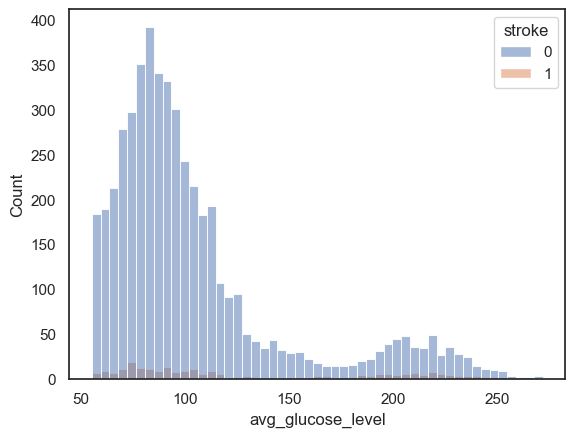

In [36]:
def glucose_stroke_dist(df):
    sns.histplot(data=df, x='avg_glucose_level', hue='stroke')

glucose_stroke_dist(stroke_data)

## Let the data confirm whether domain logic applies here

In [37]:
def glucose_transformation(df):

    df['glucose_above_150'] = (df['avg_glucose_level'] > 150).astype(int)
    bins = [0, 100, 125, float('inf')] 
    labels = ['normal', 'elevated', 'high']
    stroke_data['glucose_group'] = pd.cut(stroke_data['avg_glucose_level'], bins=bins, labels=labels)
    stroke_data['glucose_above_250'] = (stroke_data['avg_glucose_level'] > 250).astype(int)

    return df

stroke_data = glucose_transformation(stroke_data)

stroke_data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,age_over_60,age_over_80,glucose_above_150,glucose_group,glucose_above_250
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60+,1,0,1,high,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60+,1,0,1,high,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60+,1,0,0,elevated,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,30-60,0,0,1,high,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60+,1,0,1,high,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,60+,1,0,0,normal,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,60+,1,1,0,high,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,30-60,0,0,0,normal,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,30-60,0,0,1,high,0


<Axes: xlabel='bmi', ylabel='Count'>

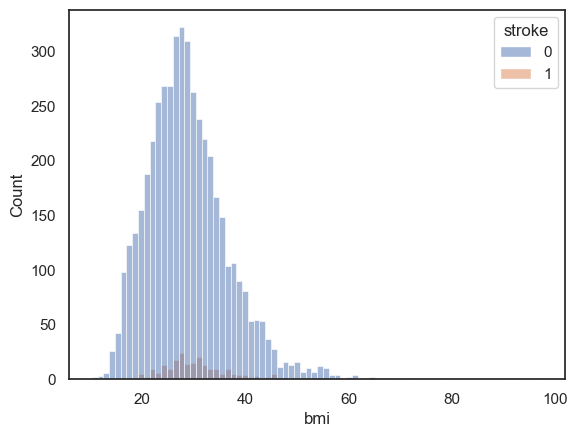

In [38]:
sns.histplot(data=stroke_data, x='bmi', hue='stroke')

In [39]:
stroke_data.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
age_group              0
age_over_60            0
age_over_80            0
glucose_above_150      0
glucose_group          0
glucose_above_250      0
dtype: int64

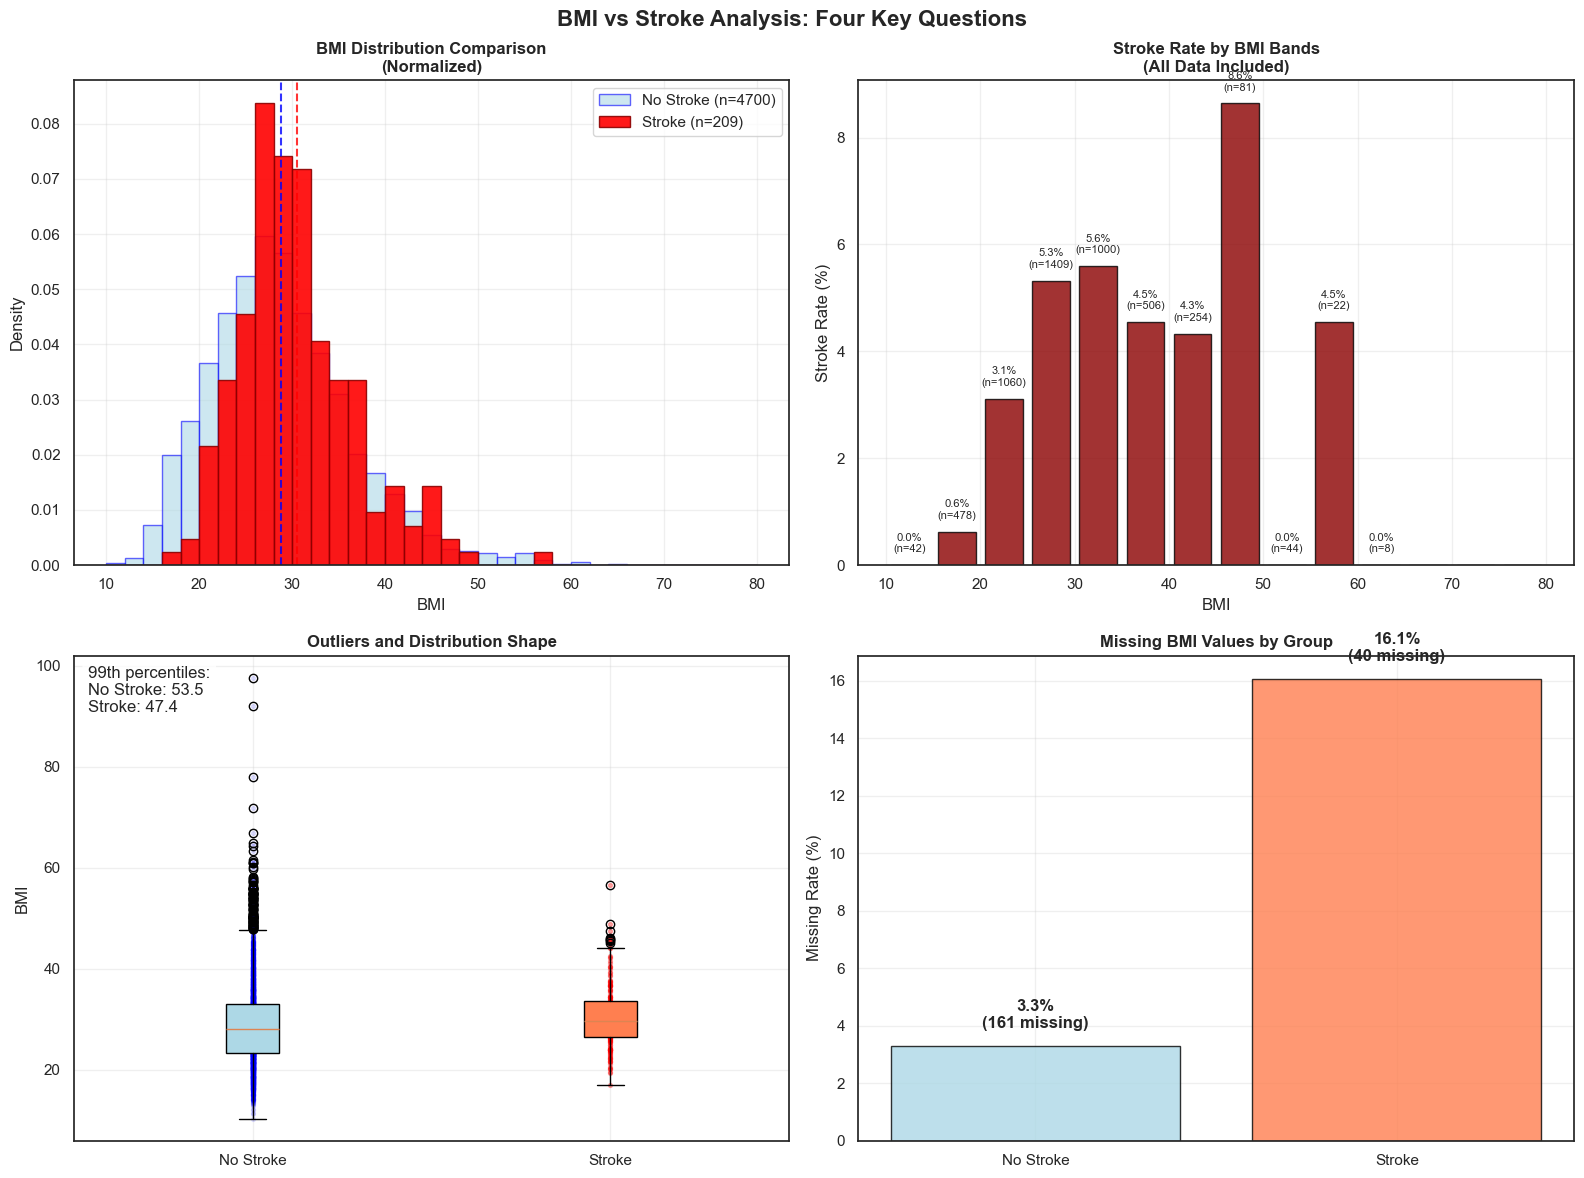

📊 BMI vs STROKE ANALYSIS SUMMARY
1. DISTRIBUTION:
   No Stroke - Mean BMI: 28.8
   Stroke    - Mean BMI: 30.5
   Difference: 1.6

2. STROKE RATES:
   Highest stroke rate: 8.6% in BMI range [45, 50)

3. OUTLIERS:
   No Stroke - 99th percentile: 53.5
   Stroke    - 99th percentile: 47.4
   Extreme values (BMI > 50): 79 cases

4. MISSING VALUES:
   Total missing: 201 out of 5110 (3.9%)
   No Stroke: 161.0 missing (3.3%)
   Stroke: 40.0 missing (16.1%)


In [40]:
from bmi_viz import plot_bmi
plot_bmi(stroke_data)

🔍 COMPREHENSIVE BMI MISSINGNESS ANALYSIS

📊 OVERALL MISSINGNESS:
   Total observations: 5,110
   Missing BMI values: 201
   Missing rate: 3.93%

📈 MISSINGNESS BY DEMOGRAPHIC GROUPS:

   By Stroke Status:
   No Stroke   : 161/4861 missing (  3.3%)
   Stroke      :  40/ 249 missing ( 16.1%)

   By Age Groups:
   <30     :  32/1515 missing (  2.1%)
   30-49   :  49/1385 missing (  3.5%)
   50-64   :  46/1183 missing (  3.9%)
   65-79   :  70/ 841 missing (  8.3%)
   80+     :   4/ 186 missing (  2.2%)

   By Gender:
   Female  :  97/2994 missing (  3.2%)
   Male    : 104/2115 missing (  4.9%)
   Other   :   0/   1 missing (  0.0%)

🧪 STATISTICAL TESTS FOR RANDOMNESS:

   Stroke vs BMI Missingness:
   Chi-square statistic: 98.5888
   P-value: 0.000000
   Interpretation: NOT random (systematic)

   Age Difference Test:
   T-statistic: 5.6607
   P-value: 0.000000
   Mean age (missing BMI): 52.0
   Mean age (non-missing BMI): 42.9
   Interpretation: Significant age difference


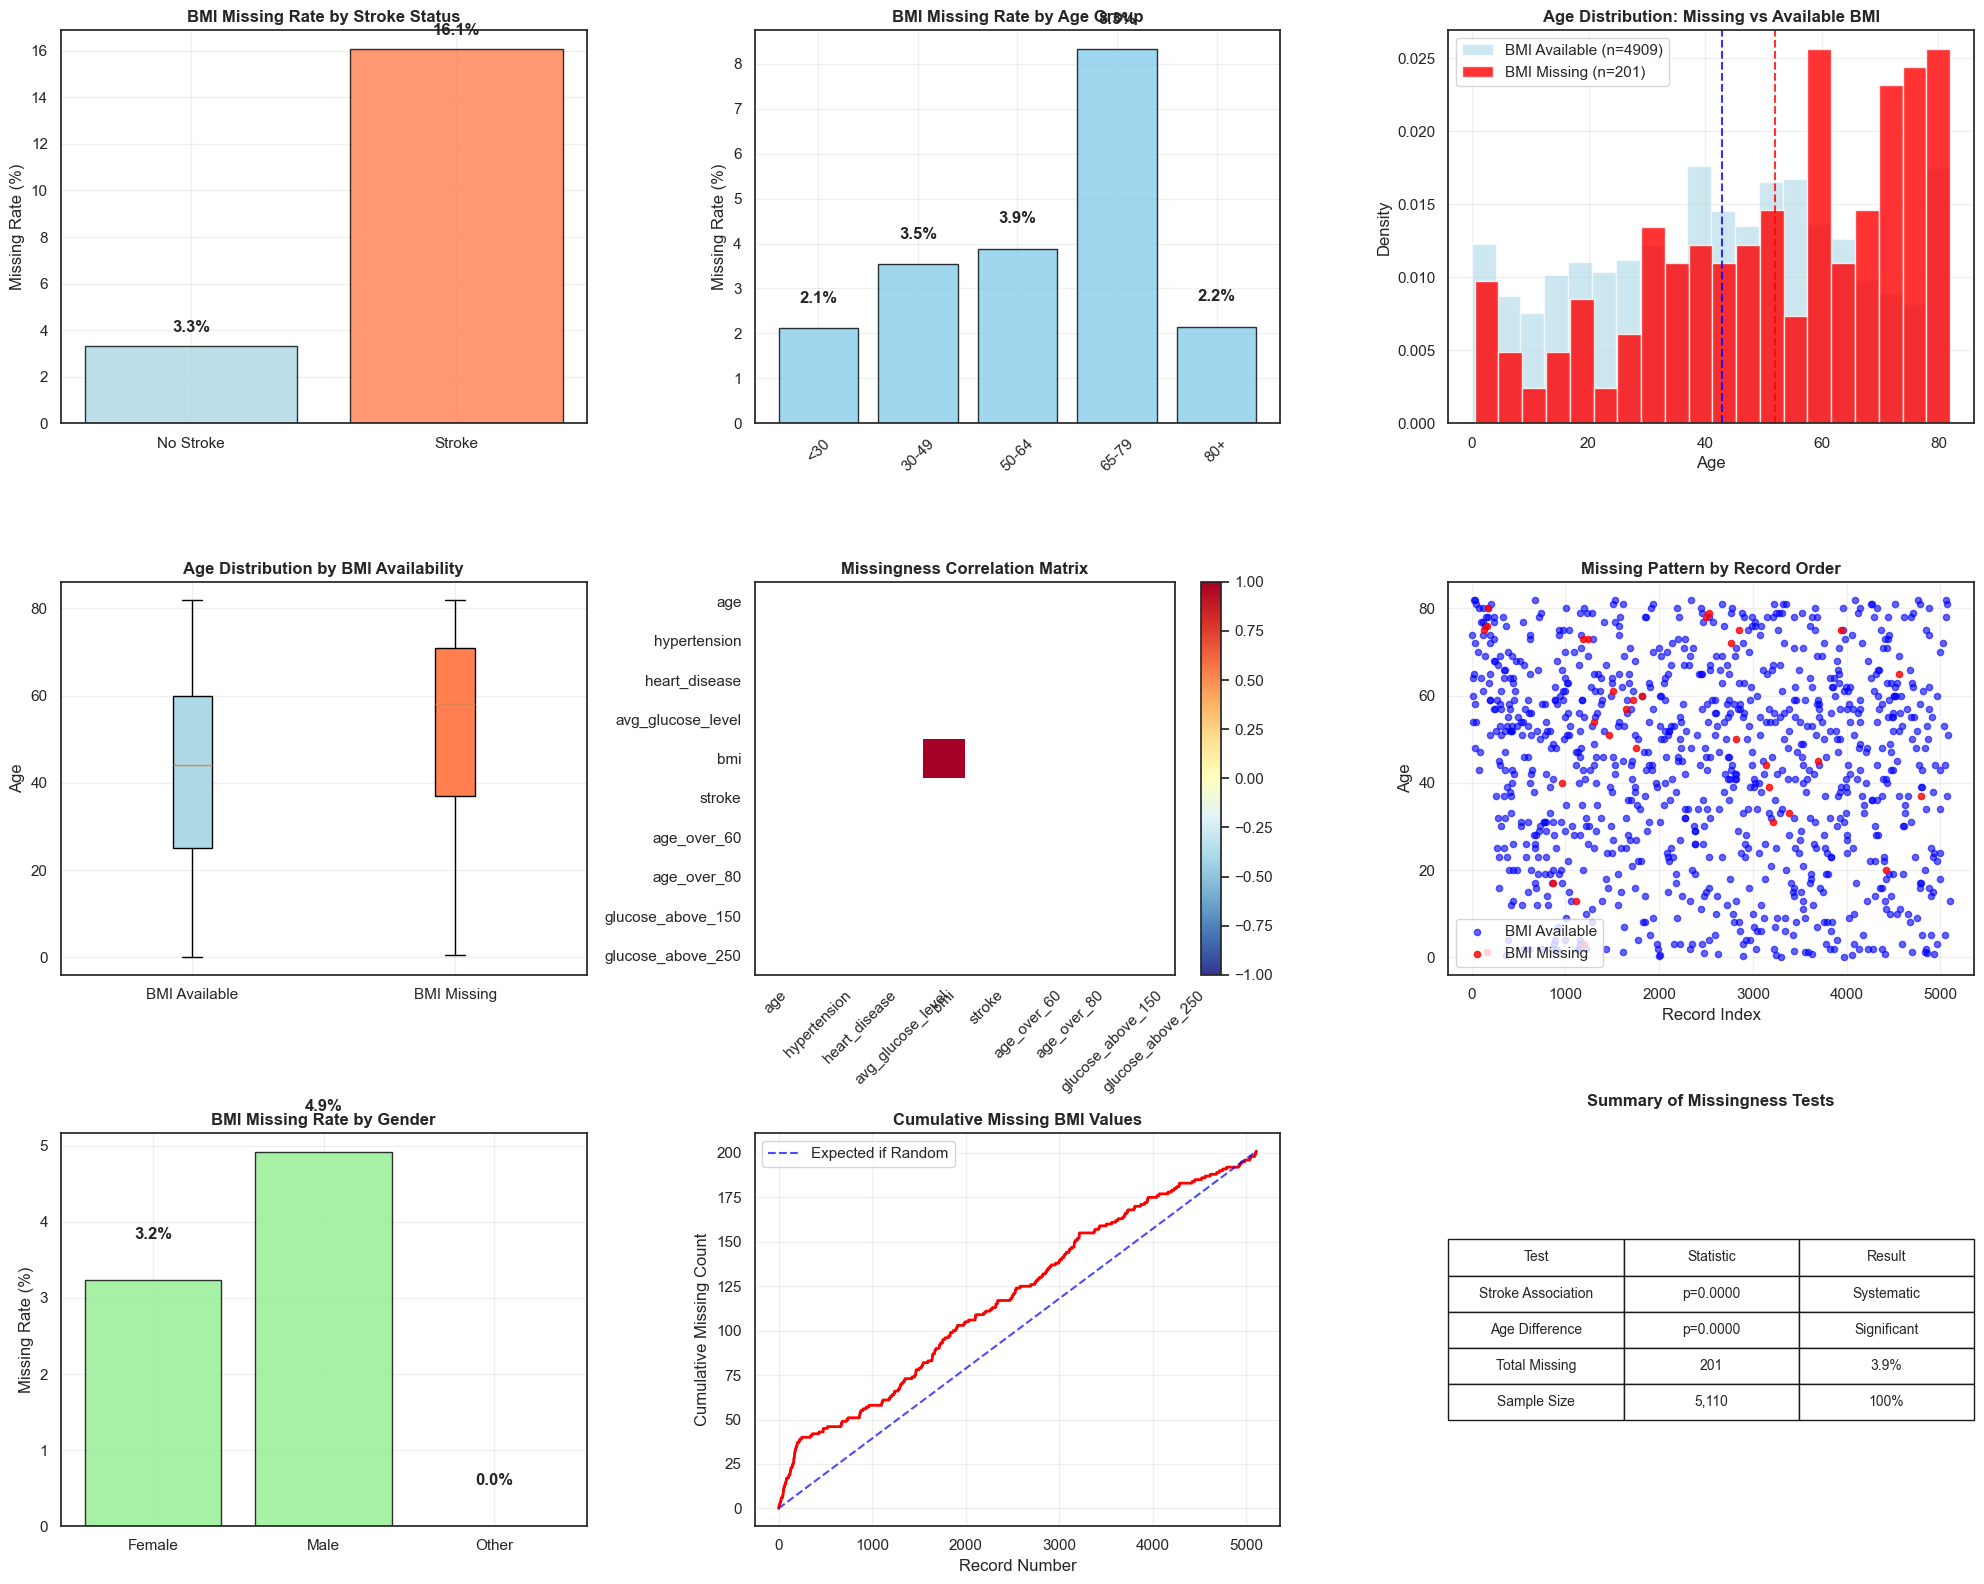


🎯 CONCLUSIONS AND RECOMMENDATIONS:
----------------------------------------
⚠️  MISSINGNESS APPEARS TO BE SYSTEMATIC
   - Significant associations found:
     • BMI missingness differs significantly by stroke status (p=0.0000)
     • Age differs significantly between missing/non-missing BMI groups (p=0.0000)
   - Missing Not at Random (MNAR) likely
   - Need careful imputation strategy
   - Consider multiple imputation or specialized methods
   - Complete case analysis may introduce bias

📋 RECOMMENDED NEXT STEPS:
   1. Investigate reasons for systematic missingness
   2. Use multiple imputation methods
   3. Consider pattern-mixture models
   4. Include missingness indicators in analysis
   5. Perform sensitivity analysis for different scenarios


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,age_over_60,age_over_80,glucose_above_150,glucose_group,glucose_above_250,bmi_missing
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,65-79,1,0,1,high,0,False
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,50-64,1,0,1,high,0,True
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,80+,1,0,0,elevated,0,False
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,30-49,0,0,1,high,0,False
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,65-79,1,0,1,high,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,80+,1,0,0,normal,0,True
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,80+,1,1,0,high,0,False
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,30-49,0,0,0,normal,0,False
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,50-64,0,0,1,high,0,False


In [41]:
from bmi_missingness_analysis import comprehensive_missingness_analysis
comprehensive_missingness_analysis(stroke_data)

In [42]:
import pandas as pd

def bmi_transform(df):
    # Define a function to categorize BMI
    def categorize_bmi(bmi):
        if bmi < 18.5:
            return 'Underweight'
        elif 18.5 <= bmi < 25.0:
            return 'Normal'
        elif 25.0 <= bmi < 30.0:
            return 'Overweight'
        elif 30.0 <= bmi < 35.0:
            return 'Obese (Class I)'
        elif 35.0 <= bmi < 40.0:
            return 'Obese (Class II)'
        else:
            return 'Morbid obesity'
    
    # Apply the categorization function to the 'bmi' column
    df['bmi_category'] = df['bmi'].apply(categorize_bmi)
    
    # Create the 'is_overweight' column
    df['is_overweight'] = (df['bmi'] > 25).astype(int)
    
    df["is_bmi_missing"] = df["bmi"].isnull().astype(int)
    
    return df

stroke_data = bmi_transform(stroke_data)
stroke_data


,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,age_over_60,age_over_80,glucose_above_150,glucose_group,glucose_above_250,bmi_category,is_overweight,is_bmi_missing
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1,60+,1,0,1,high,0,Obese (Class II),1,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1,60+,1,0,1,high,0,Morbid obesity,0,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1,60+,1,0,0,elevated,0,Obese (Class I),1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1,30-60,0,0,1,high,0,Obese (Class I),1,0
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1,60+,1,0,1,high,0,Normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0,60+,1,0,0,normal,0,Morbid obesity,0,1
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0,60+,1,1,0,high,0,Morbid obesity,1,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0,30-60,0,0,0,normal,0,Obese (Class I),1,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0,30-60,0,0,1,high,0,Overweight,1,0


In [43]:
pd.pivot_table(data=stroke_data, index='smoking_status', columns='stroke', values='age', aggfunc='count')

stroke,0,1
smoking_status,,
Unknown,1497,47
formerly smoked,815,70
never smoked,1802,90
smokes,747,42


In [44]:
stroke_data.groupby(['age_group', 'smoking_status'])['stroke'].count().unstack()

smoking_status,Unknown,formerly smoked,never smoked,smokes
age_group,,,,
0-30,859,97,466,148
30-60,442,412,916,466
60+,243,376,510,175


In [45]:
stroke_data.groupby(['age_group', 'smoking_status'])['stroke'].sum().unstack()

smoking_status,Unknown,formerly smoked,never smoked,smokes
age_group,,,,
0-30,2,0,0,0
30-60,14,16,20,20
60+,31,54,70,22


In [46]:
stroke_data.groupby(['age_group', 'smoking_status'])['stroke'].sum().unstack() / stroke_data.groupby(['age_group', 'smoking_status'])['stroke'].count().unstack()

smoking_status,Unknown,formerly smoked,never smoked,smokes
age_group,,,,
0-30,0.002328,0.000000,0.000000,0.000000
30-60,0.031674,0.038835,0.021834,0.042918
60+,0.127572,0.143617,0.137255,0.125714


🚬 COMPREHENSIVE SMOKING STATUS vs STROKE ANALYSIS

📊 SMOKING STATUS DISTRIBUTION:
   Unknown        : 1,544 ( 30.2%)
   formerly smoked:   885 ( 17.3%)
   never smoked   : 1,892 ( 37.0%)
   smokes         :   789 ( 15.4%)
   Total          : 5,110 (100.0%)

🎯 STROKE RATES BY SMOKING STATUS:
   formerly smoked:  70/  885 =   7.9%
   smokes         :  42/  789 =   5.3%
   never smoked   :  90/ 1892 =   4.8%
   Unknown        :  47/ 1544 =   3.0%

🔍 'UNKNOWN' CATEGORY ANALYSIS:
   Unknown cases: 1,544
   Mean age (Unknown): 30.2 years
   Mean age (Known): 48.9 years
   Age difference p-value: 0.000000
   Not significantly different
   Stroke rate (Unknown): 3.0%
   Stroke rate (Known): 5.7%
   Stroke rate difference p-value: 0.000064
   No significant difference

🎂 AGE-SMOKING INTERACTION ANALYSIS:
   Elderly (>60) Smokers: 551 cases, 13.8% stroke rate
   Elderly (>60) Non-smokers: 510 cases, 13.7% stroke rate
   Young (≤60) Smokers: 1,123 cases, 3.2% stroke rate
   Elderly smokers vs non

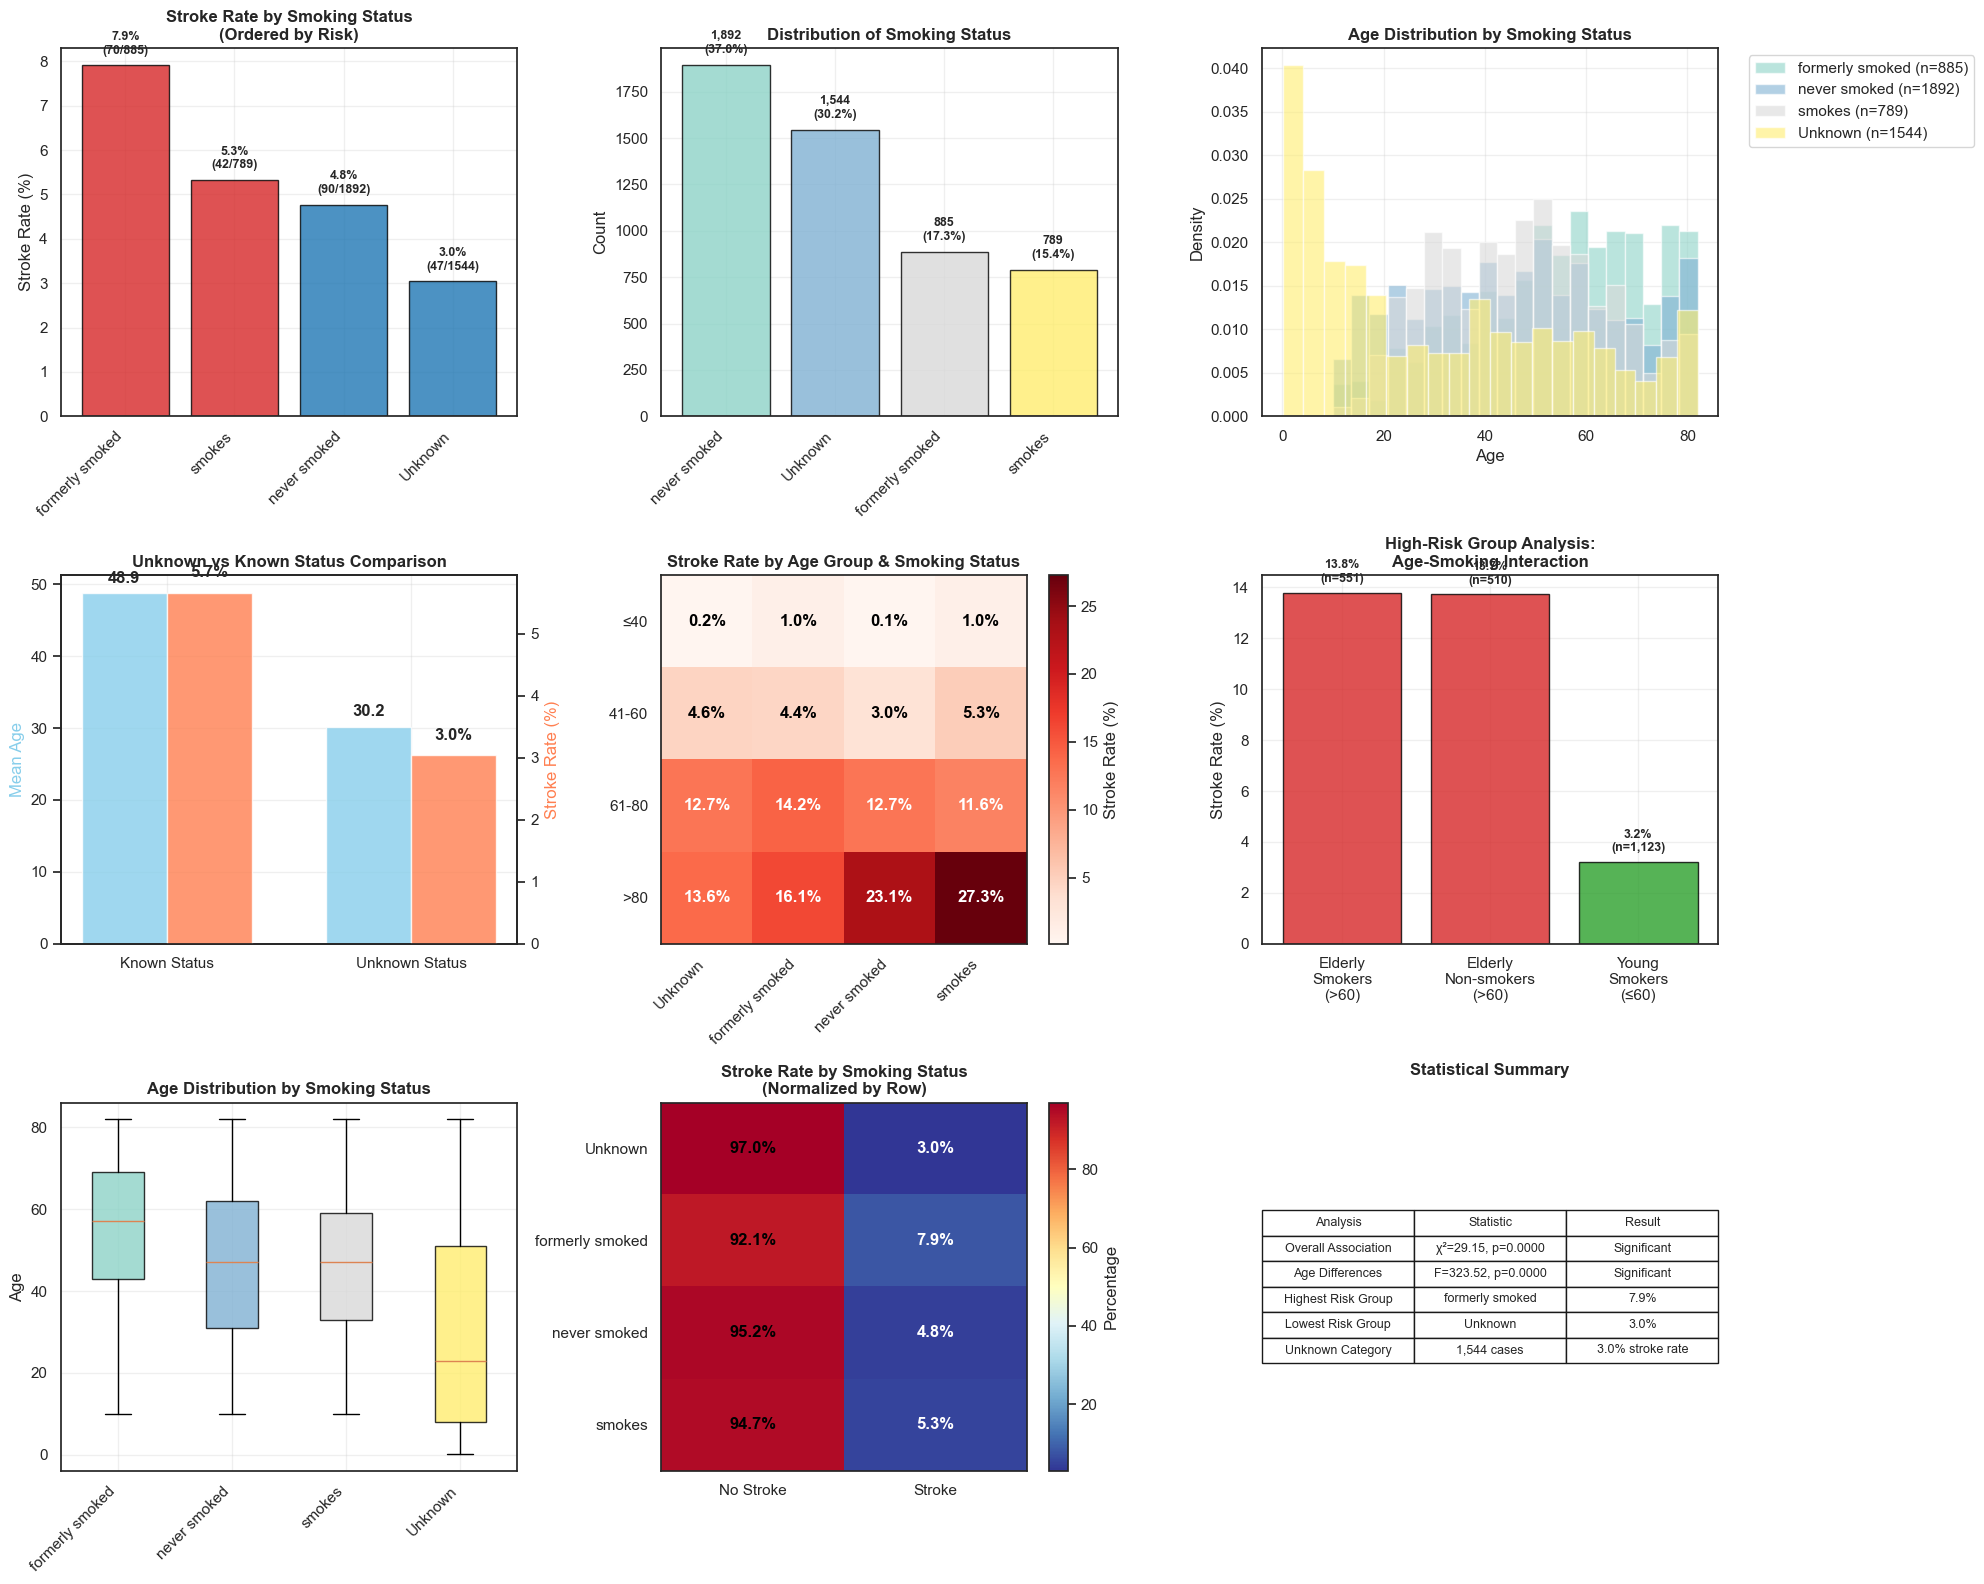


🎯 KEY FINDINGS & CONCLUSIONS:
--------------------------------------------------
📈 STROKE RISK RANKING (Highest to Lowest):
   1. formerly smoked -   7.9% 🟡 MEDIUM
   2. smokes          -   5.3% 🟡 MEDIUM
   3. never smoked    -   4.8% 🟡 MEDIUM
   4. Unknown         -   3.0% 🟢 LOW

🧪 STATISTICAL SIGNIFICANCE:
   Overall smoking-stroke association: ✅ SIGNIFICANT (p=0.0000)

🎂 AGE-SMOKING INTERACTION:
   Elderly smokers (>60): 13.8% stroke rate
   Elderly non-smokers (>60): 13.7% stroke rate
   Risk multiplier: 1.0x higher in elderly smokers
   Statistical significance: ❌ NOT SIGNIFICANT

🔍 UNKNOWN CATEGORY INSIGHTS:
   Sample size: 1,544 (30.2% of total)
   Age bias: ❌ No significant age difference
   Stroke bias: ❌ No significant difference

📋 RECOMMENDATIONS:
   1. Focus on elderly smokers as high-risk group
   2. Investigate Unknown category for potential bias
   3. Include smoking status in predictive models
   4. Consider age-smoking interaction terms in modeling


(      gender   age  hypertension  heart_disease ever_married      work_type  \
 0       Male  67.0             0              1          Yes        Private   
 1     Female  61.0             0              0          Yes  Self-employed   
 2       Male  80.0             0              1          Yes        Private   
 3     Female  49.0             0              0          Yes        Private   
 4     Female  79.0             1              0          Yes  Self-employed   
 ...      ...   ...           ...            ...          ...            ...   
 5105  Female  80.0             1              0          Yes        Private   
 5106  Female  81.0             0              0          Yes  Self-employed   
 5107  Female  35.0             0              0          Yes  Self-employed   
 5108    Male  51.0             0              0          Yes        Private   
 5109  Female  44.0             0              0          Yes       Govt_job   
 
      Residence_type  avg_glucose_leve

In [ ]:
from smoking_stroke_analysis import analyze_smoking_stroke_risk
analyze_smoking_stroke_risk(stroke_data)

## Unknown has a low stroke rate, but that low risk is due to age, not smoking,

In [48]:
def smoking_status_transformation(df):
    df['is_smoking_unknown'] = (df.smoking_status == 'Unknown').astype(int)
    df['is_smokes'] = (df.smoking_status == 'smokes').astype(int)
    return df
stroke_data = smoking_status_transformation(stroke_data)
stroke_data

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,age_over_60,age_over_80,glucose_above_150,glucose_group,glucose_above_250,bmi_category,is_overweight,is_bmi_missing,is_smoking_unknown,is_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,1,0,1,high,0,Obese (Class II),1,0,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,...,1,0,1,high,0,Morbid obesity,0,1,0,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,1,0,0,elevated,0,Obese (Class I),1,0,0,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,0,0,1,high,0,Obese (Class I),1,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,1,0,1,high,0,Normal,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,...,1,0,0,normal,0,Morbid obesity,0,1,0,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,...,1,1,0,high,0,Morbid obesity,1,0,0,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,...,0,0,0,normal,0,Obese (Class I),1,0,0,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,...,0,0,1,high,0,Overweight,1,0,0,0


Let’s apply the structured approach—this time, not to transform the target itself, but to understand how `imbalance` in the target can distort your `model’s learning` and `loss function`.

In [49]:
stroke_data.value_counts(subset='stroke', dropna=False, normalize=True) * 100

stroke
0    95.127202
1     4.872798
Name: proportion, dtype: float64

In [50]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import numpy as np

class BMICustomImputer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.imputer = IterativeImputer(random_state=42)

    def fit(self, X, y=None):
        bmi_data = X[["age", "bmi"]].to_numpy()
        self.imputer.fit(bmi_data)
        return self

    def transform(self, X):
        bmi_data = X[["age", "bmi"]].to_numpy()
        imputed = self.imputer.transform(bmi_data)
        X = X.copy()
        X["bmi"] = imputed[:, 1]
        return X

In [ ]:
columns_to_use = [
    # 'gender', 
    'age', 

    # NOT USING FOR NOW
    # 'hypertension', 'heart_disease', 'ever_married',
    # 'work_type', 'residence_type', 
    
    'avg_glucose_level', 
    'bmi',
    'smoking_status', 
    'age_group', 
    'age_over_60', 
    'age_over_80',
    'glucose_above_150', 
    'glucose_group', 
    'glucose_above_250',
    'bmi_category', 
    'is_overweight', 
    'is_bmi_missing', 
    'is_smoking_unknown',
    'is_smokes'
]

X = stroke_data[columns_to_use].copy()
y = stroke_data['stroke'].copy()

categorical_cols = X.select_dtypes(exclude=[int, float]).columns
col_to_impute = ['bmi']
categorical_cols

Index(['smoking_status', 'age_group', 'glucose_group', 'bmi_category'], dtype='object')

In [52]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, stratify=y
)

### Guiding Question

> “Which flags might allow the model to memorize rare stroke cases instead of generalizing risk?”

Example:

- If glucose_above_250 appears in only 5 stroke cases, it might create an overfit path.

- But glucose_above_150 might be much more general and worth keeping.

Use frequency tables to prune unstable features.

### When you see perfect performance on training but terrible generalization, it suggests:

>The model has too many paths, and because the minority class is rare, it is memorizing those specific paths in the training data without learning general rules.

This is especially risky when:

- Your engineered paths have very low frequency (e.g., age > 80 & glucose > 250 & bmi missing)

- Your flags are correlated with each other and with the target, but not causally robust

### This Is Not a Failure of Feature Engineering—It’s a Signal
> It means: some of the engineered paths you gave the model were too specific or unstable.

The principle still holds:

- Redundancy helps when it allows the model to generalize.

- But over-specified redundancy gives the model shortcuts.

## 🧠 Q1: How do I test whether the model is memorizing rare paths?

Here’s the structured test plan:

---

### ✅ **Step 1: Identify features that encode rare events**

Look for binary flags or categories like:

| Feature                                      | Hypothesis                                                  |
| -------------------------------------------- | ----------------------------------------------------------- |
| `age_over_80`                                | Few people in this group; may be overrepresented in stroke  |
| `glucose_above_250`                          | Very few rows; might act as a near-perfect proxy for stroke |
| `is_bmi_missing`                             | Missing BMI disproportionately occurs in stroke cases       |
| `is_smoking_unknown`                         | Possibly MNAR and strongly correlated with stroke           |
| Any one-hot category with very low frequency | Trees might split on it early if correlated with target     |

---

### ✅ **Step 2: Build a Frequency Table (Contingency Table)**

For each **binary** or **categorical** feature, get:

```python
pd.crosstab(X_train[feature], y_train, normalize='index')
```

This tells you:

* What % of people with `feature=1` had a stroke
* How many actual rows had `feature=1`

Then sort by:

* `stroke=1` percentage (to find high-precision proxies)
* Or total row count (to find dangerously small groups)

You're looking for red flags like:

> “This feature is `True` in only 8 rows, and 7 of them had a stroke.”

That's a **shortcut** the model will greedily memorize.

---

## 🔍 Q2: How do I distinguish overfitting vs data leakage?

### ✅ You already noticed this behavior:

> "Train performance is perfect. Test performance is poor."

But what separates **overfitting** from **leakage**?

### ✅ Signs of Overfitting:

| Clue                                                              | Interpretation              |
| ----------------------------------------------------------------- | --------------------------- |
| Perfect train performance, poor test generalization               | Normal symptom              |
| Small groups dominate splits                                      | Trees memorizing leaf paths |
| Performance improves when removing redundant or unstable features | Model was chasing noise     |

### ✅ Signs of Leakage:

| Clue                                                                                 | Interpretation      |
| ------------------------------------------------------------------------------------ | ------------------- |
| Features were computed using the target (`stroke`)                                   | Direct leakage      |
| Flags are strongly correlated with stroke **due to data collection**, not structure  | Hidden leakage      |
| Removing a feature makes train performance drop but test performance improve sharply | Feature leaked info |

🔍 The line is blurry when a flag **indirectly encodes the target** (e.g., `is_bmi_missing` behaves like a stroke flag because BMI is missing more in stroke rows).

> To test this: drop one suspect feature and compare **train F1** and **test F1**.

* If **train F1 drops**, but **test F1 improves** → it's leakage or spurious correlation.
* If **both drop**, maybe it was helping generalization.

---

## 🔎 Q3: How do I test whether features introduce over-specific paths?

Use:

### ✅ (A) Feature Frequency Tables (as above)

If:

* A flag is `True` in only 20 rows
* 15 of them had stroke

→ That feature might create **tiny leaves** in trees that look perfect during training but don't generalize.

### ✅ (B) SHAP or Feature Importances

If SHAP shows:

* High feature importance for flags with **very low frequency**
* That’s often a sign that trees are **relying heavily on unstable paths**

the cardinal rule:

> Your test data should simulate the real world: unknown, untouched, untrusted.

> Even viewing patterns in the test data and using that to modify your pipeline is leakage—just in disguise.

In [53]:
X_train.columns

Index(['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_group',
       'age_over_60', 'age_over_80', 'glucose_above_150', 'glucose_group',
       'glucose_above_250', 'bmi_category', 'is_overweight', 'is_bmi_missing',
       'is_smoking_unknown', 'is_smokes'],
      dtype='object')

In [54]:
X_train.value_counts('age_over_80')

age_over_80
0    3494
1      83
Name: count, dtype: int64

In [55]:
pd.crosstab(X_train['age_over_60'], y_train, normalize='index').round(4)

stroke,0,1
age_over_60,,
0,0.9801,0.0199
1,0.8670,0.1330


In [56]:
pd.crosstab(X_train['age_over_80'], y_train, normalize='index').round(4)

stroke,0,1
age_over_80,,
0,0.9556,0.0444
1,0.7711,0.2289


In [57]:
stroke_data.value_counts('stroke', normalize=1)

stroke
0    0.951272
1    0.048728
Name: proportion, dtype: float64

In [58]:
sum(y_train), len(y_train)

(174, 3577)

### 🎯 First, Let’s Define the Three Concepts Together

| Concept                  | Definition                                                   | Question it answers                                                     |
| ------------------------ | ------------------------------------------------------------ | ----------------------------------------------------------------------- |
| **Support**              | How many rows have `feature=1`                               | “Is this group even big enough to trust statistically?”                 |
| **Stroke Rate**          | Fraction of those with `feature=1` who had stroke            | “Is stroke more likely in this group?”                                  |
| **Signal Concentration** | What **fraction of *all* stroke cases** fall into this group | “Does this group explain a big chunk of stroke cases, or just a spike?” |

You need all three to understand if:

* A group has strong signal (high stroke rate)
* That signal is reliable (high support)
* That signal is **relevant to the global problem**, not just a **quirk of a small corner**


In [59]:
pd.crosstab(X_train['glucose_above_250'], y_train)

stroke,0,1
glucose_above_250,,
0,3388,170
1,15,4


> “Group looks pure” means: when the tree splits on it, the resulting leaf has a lower impurity (higher class consistency).
But if that purity is based on low counts, it’s not real. It’s statistical mirage.
And if the tree relies on these mirages too often, it overfits.

In [60]:
pd.crosstab(X_train['glucose_above_150'], y_train)

stroke,0,1
glucose_above_150,,
0,2970,113
1,433,61


In [61]:
pd.crosstab(X_train['is_bmi_missing'], y_train)

stroke,0,1
is_bmi_missing,,
0,3297,146
1,106,28


In [62]:
X_train.columns

Index(['age', 'avg_glucose_level', 'bmi', 'smoking_status', 'age_group',
       'age_over_60', 'age_over_80', 'glucose_above_150', 'glucose_group',
       'glucose_above_250', 'bmi_category', 'is_overweight', 'is_bmi_missing',
       'is_smoking_unknown', 'is_smokes'],
      dtype='object')

In [142]:
X = stroke_data[[
    'age', 'avg_glucose_level', 'bmi',
       # 'age_over_60', 'glucose_above_150', 'is_bmi_missing'
       ]]
y = stroke_data['stroke']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, stratify=y)

In [151]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.metrics import f1_score, classification_report, precision_recall_curve, auc, roc_auc_score, roc_curve

# age_order = ["0-30", "30-60", "60+"]
# glucose_order = ['normal', 'elevated', 'high']
# bmi_order = ['Underweight', 'Normal', 'Overweight', 'Obese (Class I)', 'Obese (Class II)', 'Morbid obesity']  

# preprocessor = ColumnTransformer(
#     transformers=[
#         ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False), ['gender', 'smoking_status']),
#         ('ordinal', OrdinalEncoder(
#             categories=[age_order, glucose_order, bmi_order]
#             ),
#             ['age_group', 'glucose_group', 'bmi_category']
#         ),
#     ],
#     remainder='passthrough'
# )


regularized_rf = RandomForestClassifier(
    n_estimators=100,          # Reasonable number of trees
    max_depth=5,               # Limit tree depth
    min_samples_split=3,      # Require more samples to split
    min_samples_leaf=5,       # Require more samples in leaf nodes
    # max_features='sqrt',       # Limit features considered per split
    random_state=98
)

pipeline_reg = Pipeline(steps=[
    ('rf_classifier', regularized_rf)
])

# Fit the regularized model
pipeline_reg.fit(X_train, y_train)

# Check training performance
y_train_pred = pipeline_reg.predict(X_train)
print("REGULARIZED MODEL - Training Performance:")
print(classification_report(y_train, y_train_pred))

# Check test performance
y_test_pred = pipeline_reg.predict(X_test)
print("\nREGULARIZED MODEL - Test Performance:")
print(classification_report(y_test, y_test_pred))

REGULARIZED MODEL - Training Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3403
           1       0.90      0.05      0.10       174

    accuracy                           0.95      3577
   macro avg       0.93      0.53      0.54      3577
weighted avg       0.95      0.95      0.93      3577


REGULARIZED MODEL - Test Performance:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1458
           1       0.50      0.01      0.03        75

    accuracy                           0.95      1533
   macro avg       0.73      0.51      0.50      1533
weighted avg       0.93      0.95      0.93      1533

